### Carrega bibliotecas do Statsmodels e NumPy

In [1]:
import statsmodels.api as sm
import numpy as np

### Carrega os dados

In [2]:
data_str = '''Region;Alcohol;Tobacco
    North;6.47;4.03
    Yorkshire;6.13;3.76
    Northeast;6.19;3.77
    East Midlands;4.89;3.34
    West Midlands;5.63;3.47
    East Anglia;4.52;2.92
    Southeast;5.89;3.20
    Southwest;4.79;2.71
    Wales;5.27;3.53
    Scotland;6.08;4.51
    Northern Ireland;4.02;4.56'''

d = data_str.split('\n')
d = [ i.split(';') for i in d ]

### Prepara os dados

In [3]:
reg = []
dados = []

for r in d:
    reg.append(r[0])
    dados.append(r[1:])

reg = np.array(reg[1:])
dados = np.array(dados[1:],dtype=np.float32)

X = dados[:,0]
Y = dados[:,1]

### Executa a regressão linear

In [4]:
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())
print(results.params)
print(np.column_stack((results.fittedvalues, Y)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.4735
Date:                Tue, 23 May 2023   Prob (F-statistic):              0.509
Time:                        00:02:45   Log-Likelihood:                -9.0113
No. Observations:                  11   AIC:                             22.02
Df Residuals:                       9   BIC:                             22.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7170      1.322      2.055      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Plota os dados Entrada/Saída Esperada

(2.0, 5.0)

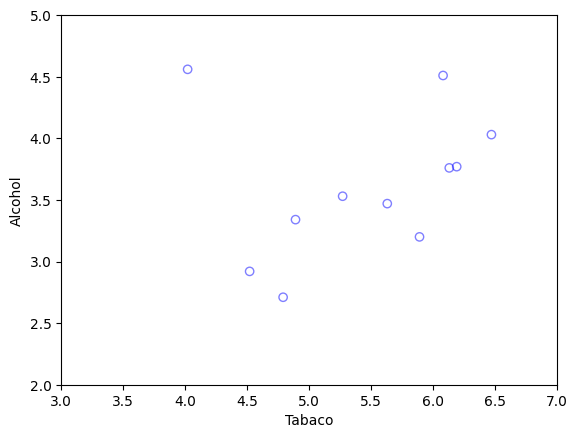

In [9]:
from matplotlib.pyplot import scatter,xlabel,ylabel,xlim,ylim

scatter( dados[:,0], dados[:,1],
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=0.5 )
xlabel('Tabaco')
ylabel('Alcohol')
xlim(3, 7)
ylim(2, 5)

### Plota os dados Entrada/Saída Estimada

(2.0, 5.0)

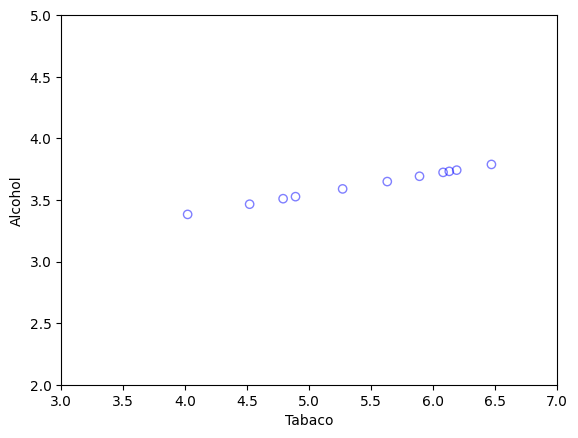

In [10]:
from matplotlib.pyplot import scatter,xlabel,ylabel,xlim,ylim

scatter( dados[:,0], results.fittedvalues,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=0.5 )
xlabel('Tabaco')
ylabel('Alcohol')
xlim(3, 7)
ylim(2, 5)